In [1]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import xgboost as xgb
from xgboost import plot_importance
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
#                                                     test_size=0.20, random_state=11)

In [1]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 10.8 MB/s eta 0:00:00


In [7]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.20, random_state=11)
X_tr, X_val, y_tr,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=123)

lgbm_wrapper = LGBMClassifier(n_estimators=400,learning_rate=0.05)

evals=[(X_tr,y_tr),(X_val,y_val)]
lgbm_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50, eval_metric="logloss",eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.628873	valid_1's binary_logloss: 0.596434
[2]	training's binary_logloss: 0.592611	valid_1's binary_logloss: 0.56658
[3]	training's binary_logloss: 0.559861	valid_1's binary_logloss: 0.538336
[4]	training's binary_logloss: 0.529516	valid_1's binary_logloss: 0.514396
[5]	training's binary_logloss: 0.501979	valid_1's binary_logloss: 0.491121
[6]	training's binary_logloss: 0.476703	valid_1's binary_logloss: 0.471333
[7]	training's binary_logloss: 0.453415	valid_1's binary_logloss: 0.452798
[8]	training's binary_logloss: 0.431639	valid_1's binary_logloss: 0.43638
[9]	training's binary_logloss: 0.411585	valid_1's binary_logloss: 0.419912
[10]	training's binary_logloss: 0.39069	valid_1's binary_logloss: 0.405592
[11]	training's binary_logloss: 0.373202	valid_1's binary_logloss: 0.393111
[12]	training's binary_logloss: 0.356911	valid_1's binary_logloss: 0.381471
[13]	training's binary_logloss: 0.339853	valid_1's binary_logloss: 0.370099
[14]	training's binary_l

해당 코드에서 evals=[(X_tr, y_tr), (X_val, y_val)]은 LightGBM 모델의 학습 과정에서 검증 데이터셋을 지정하는 부분입니다.

evals는 검증 데이터셋을 설정하기 위한 매개변수로, 리스트 형태로 지정됩니다. 각각의 튜플은 (데이터, 레이블)의 형태로 검증 데이터셋을 나타냅니다.

여기서 X_tr, y_tr은 학습용 데이터셋에서 일부를 분리한 데이터로, 모델이 학습을 진행하면서 이 데이터셋을 이용하여 성능을 평가합니다. X_val, y_val은 검증용 데이터셋으로, 모델 학습 중에 검증 데이터셋을 이용하여 조기 정지(early stopping)를 수행하거나 모델의 성능을 모니터링합니다.

eval_metric="logloss"는 모델의 성능 평가 지표로 로그 손실(log loss)를 사용한다는 의미입니다. 로그 손실은 이진 분류 문제에서 일반적으로 사용되는 평가 지표 중 하나입니다.

early_stopping_rounds=50은 조기 정지를 수행하는 기준입니다. 이 매개변수는 모델이 지정된 횟수(50번) 동안 성능 향상이 없을 경우 학습을 중지시킵니다.

따라서, evals=[(X_tr, y_tr), (X_val, y_val)]은 학습과정에서 모델의 성능을 평가하기 위해 학습용 데이터(X_tr, y_tr)와 검증용 데이터(X_val, y_val)를 사용한다는 의미입니다.

In [8]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬', '\n', confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [9]:
get_clf_eval(y_test,preds,pred_proba)

오차 행렬 
 [[36  2]
 [ 0 76]]
정확도: 0.9825, 정밀도: 0.9744, 재현율: 1.0000,    F1: 0.9870, AUC:0.9993


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

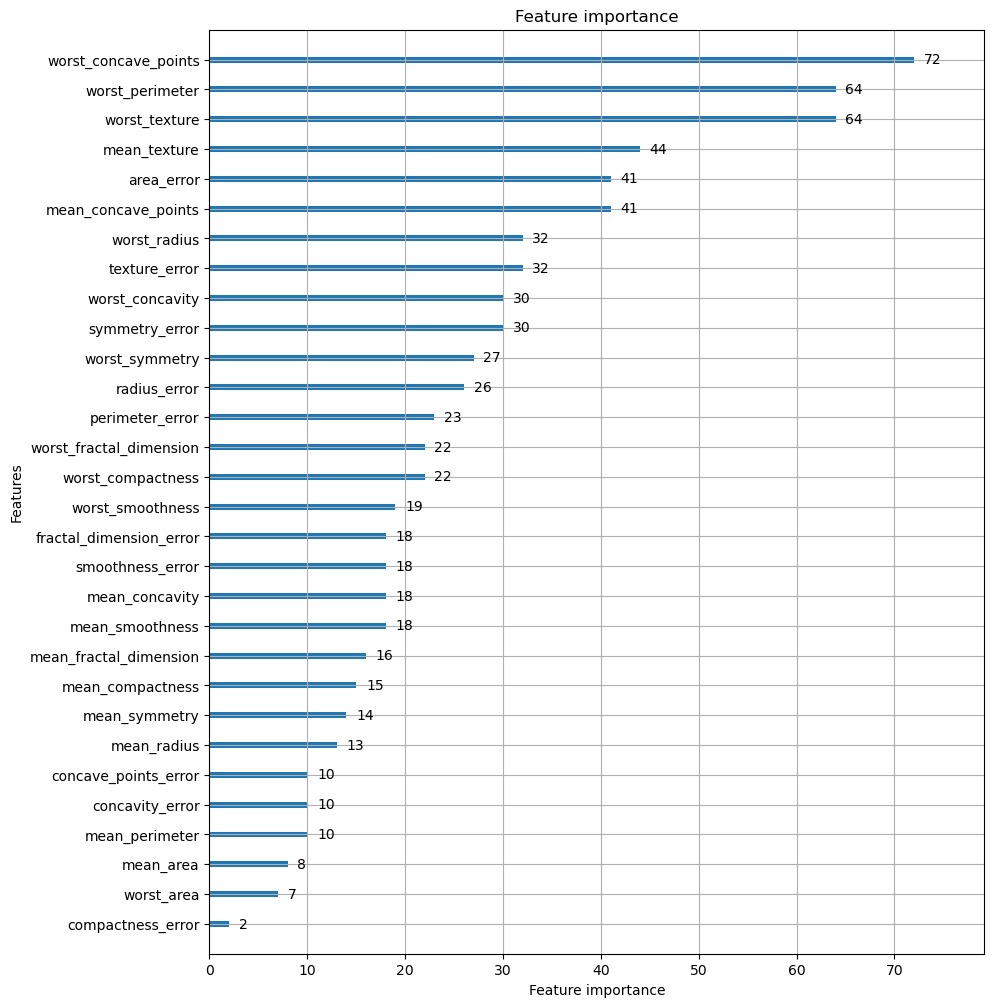

In [12]:
from lightgbm import plot_importance
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

#### ppt설명
최근에 가장 많이 사용하는 건 부스팅 모델,
분류의 여러 가지 모델이 잘 개발이 되어와서 잘 쓰이진 않지만 그래도 알고는 있어야 한다.
- knn : 새로운 관측값이 주어지면 가장 속성이 비슷한 이웃을 먼저 찾음, 가까운 목표 값과 같은 값으로 분류하여 예측. k값에 따라 예측의 정확도가 달라지므로 적절한 k값을 찾는 것이 중요(k값은 정해줘야 한다)
- svm : Margin이란 선과 가장 가까운 양 옆 데이터와의 거리. 선과 가장 가까운 포인트를 서포트 벡터(Support vector)라고 한다. 데이터를 정확히 분류하는 범위를 먼저 찾고, 그 범위 안에서 Margin을 최대화하는 구분선을 선택. 로버스트하다는 것은 아웃라이어(outlier)의 영향을 받지 않는다는 의미. 어느 정도 outlier를 무시하고 최적의 구분선
- rl : p/(1-p):odds ratio에 로그를 씌운 게 로짓(logit)함수. 로짓함수 적용 => s자 곡선,임계값 0.5로 두고 성공/실패 구분. 이게 시그모이드 함수임.
